# Correlation Analysis: Model Error vs. Feature Effect Error

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>
<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

## Model Results

In [1]:
config_file = "../../config_sim_simple_scenarios_20.ini"

In [2]:
from configparser import ConfigParser
import pandas as pd

from feature_effect_empirical_analysis.plotting.utils import create_joined_melted_df
from feature_effect_empirical_analysis.plotting.plots import plot_correlation_analysis

In [3]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

In [4]:
model_results_storage = config.get("storage", "model_results")
df_model_res = pd.read_sql_table("model_results", f"sqlite:///..{model_results_storage}")
df_model_res.head()

,index,model_id,model,simulation,n_train,snr,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.017445,0.097958,0.102183,0.212405,0.995788,0.974173
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.005408,0.125746,0.056855,0.235686,0.998694,0.966847
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.036457,0.039133,0.151463,0.157932,0.991197,0.989683
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.034783,0.038573,0.148330,0.156904,0.991601,0.989830
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.031618,0.041061,0.141311,0.161780,0.992365,0.989174


## Feature Effect Results

In [5]:
feauture_effect_type = "pdp_results"

In [6]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,2.007301,0.254855,1.994282e-03,2.484539e-02
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,2.113571,0.468118,1.349524e-03,3.569207e-02
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.030408,0.007777,7.548377e-04,2.988993e-05
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.014924,0.005960,2.608712e-08,2.608712e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.004364,0.010913,2.119711e-03,4.156240e-03


## Correlation Analysis

In [7]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.017445,0.097958,0.102183,0.212405,0.995788,0.974173,x_1,2.007301
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.005408,0.125746,0.056855,0.235686,0.998694,0.966847,x_1,2.113571
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.036457,0.039133,0.151463,0.157932,0.991197,0.989683,x_1,0.030408
3,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.034783,0.038573,0.148330,0.156904,0.991601,0.989830,x_1,0.014924
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.031618,0.041061,0.141311,0.161780,0.992365,0.989174,x_1,0.004364


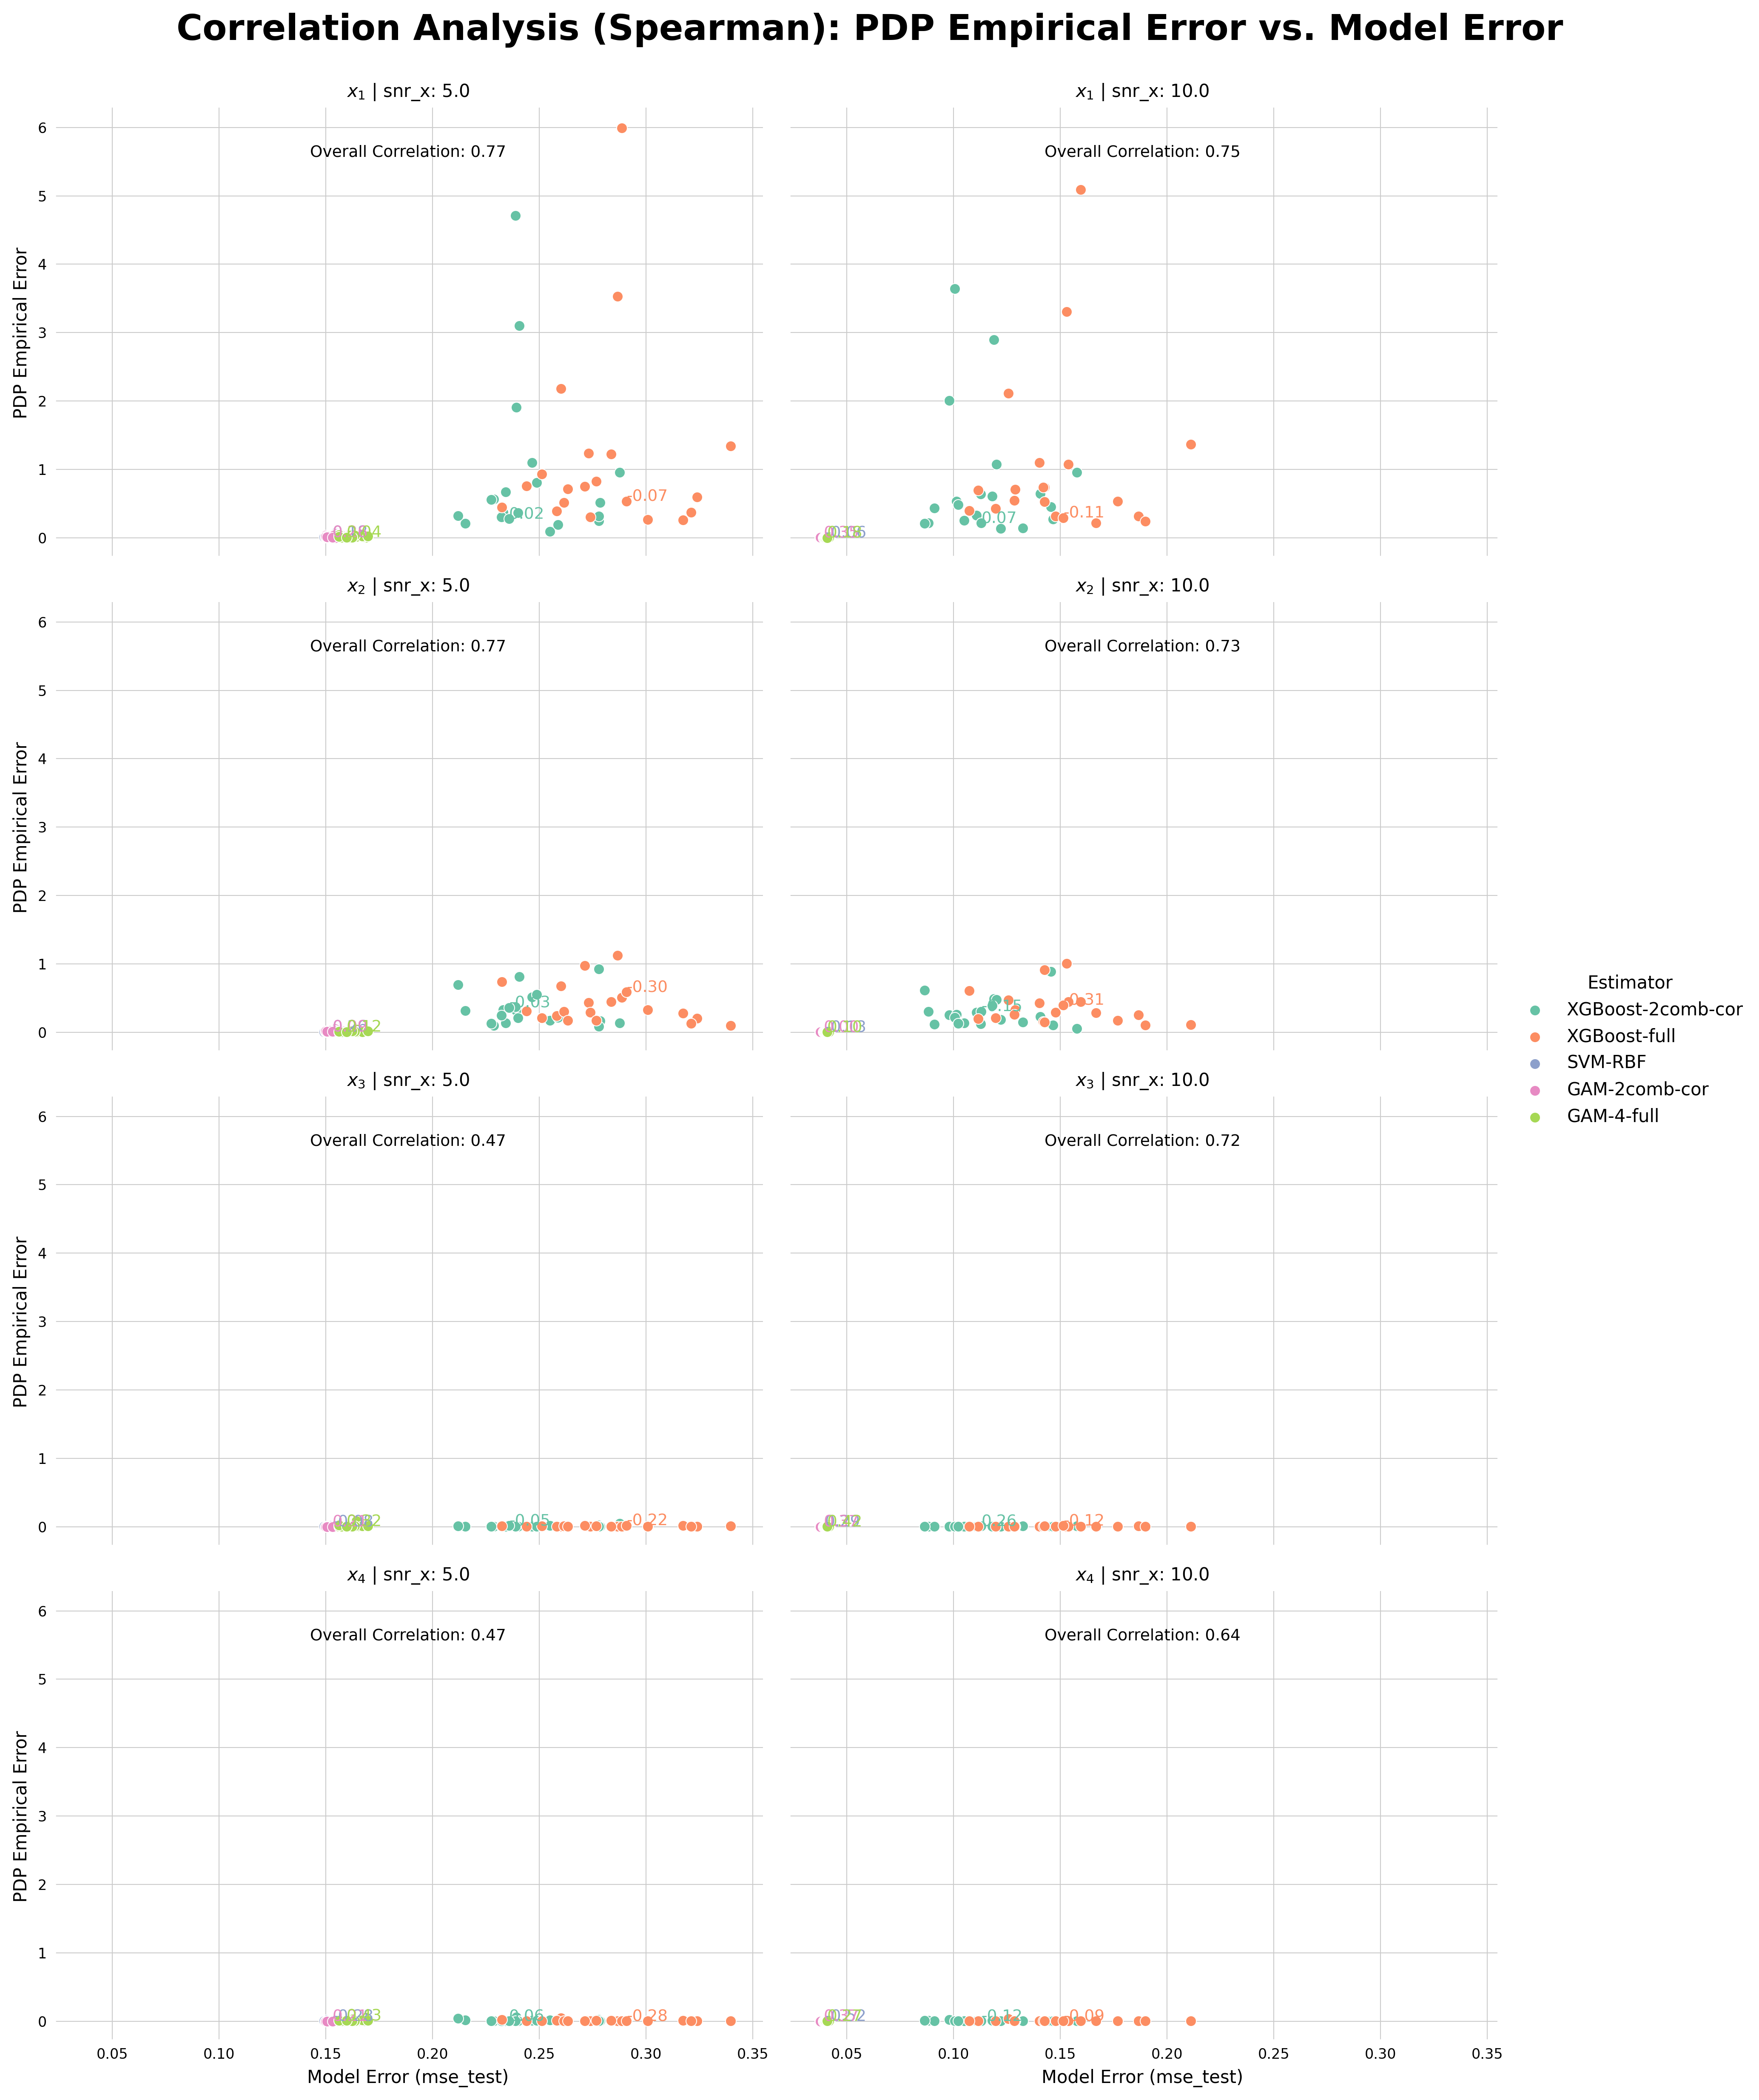

In [8]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="PDP Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [9]:
g;

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                         
x_1     5.0  Overall               0.771317
             XGBoost-2comb-cor     0.015038
             XGBoost-full         -0.070677
             SVM-RBF               0.177444
             GAM-2comb-cor         0.264662
             GAM-4-full            0.040602
        10.0 Overall               0.745107
             XGBoost-2comb-cor     0.067669
             XGBoost-full         -0.111278
             SVM-RBF              -0.055639
             GAM-2comb-cor         0.354887
             GAM-4-full            0.184962
x_2     5.0  Overall               0.771641
             XGBoost-2comb-cor    -0.034586
             XGBoost-full         -0.296241
             SVM-RBF               0.263158
             GAM-2comb-cor         0.088722
             GAM-4-full            0.121805
        10.0 Overall               0.730861
             XGBoost-2comb-cor    -0.148872
             XGBoost-full         -0.305263
             SVM-RBF              -0.129323
             GAM-2comb-cor         0.000000
             GAM-4-full            0.100752
x_3     5.0  Overall               0.469991
             XGBoost-2comb-cor    -0.049624
             XGBoost-full         -0.221053
             SVM-RBF              -0.075188
             GAM-2comb-cor         0.212030
             GAM-4-full            0.317293
        10.0 Overall               0.716628
             XGBoost-2comb-cor     0.258647
             XGBoost-full         -0.121805
             SVM-RBF               0.290226
             GAM-2comb-cor         0.366917
             GAM-4-full            0.418045
x_4     5.0  Overall               0.473531
             XGBoost-2comb-cor     0.064662
             XGBoost-full         -0.282707
             SVM-RBF              -0.278195
             GAM-2comb-cor         0.212030
             GAM-4-full            0.430075
        10.0 Overall               0.635548
             XGBoost-2comb-cor    -0.120301
             XGBoost-full         -0.087218
             SVM-RBF              -0.523308
             GAM-2comb-cor         0.366917
             GAM-4-full            0.266165

## Feature Effect Results

In [11]:
feauture_effect_type = "ale_results"

In [12]:
effects_results_storage = config.get("storage", "effects_results")
df_effect_res = pd.read_sql_table(feauture_effect_type, f"sqlite:///..{effects_results_storage}")
df_effect_res.head()

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,mean_squared_error,0.022243,0.097029,0.002220,0.003219
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.029336,0.105663,0.004211,0.003556
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000925,0.000568,0.000184,0.000016
3,0,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,mean_squared_error,0.000982,0.000641,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000340,0.000553,0.000593,0.001009


## Correlation Analysis

In [13]:
df_melted = create_joined_melted_df(df_model_res, df_effect_res, value_vars=["x_1", "x_2", "x_3", "x_4"])
df_melted.head()

,model_id,model_x,simulation_x,n_train_x,snr_x,mse_train,mse_test,mae_train,mae_test,r2_train,r2_test,feature,effect_error
0,XGBoost-2comb-cor_1_1000_10,XGBoost-2comb-cor,1,1000,10.0,0.017445,0.097958,0.102183,0.212405,0.995788,0.974173,x_1,0.022243
1,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,0.005408,0.125746,0.056855,0.235686,0.998694,0.966847,x_1,0.029336
2,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,0.036457,0.039133,0.151463,0.157932,0.991197,0.989683,x_1,0.000925
3,GAM-2comb-cor_1_1000_10,GAM-2comb-cor,1,1000,10.0,0.034783,0.038573,0.148330,0.156904,0.991601,0.989830,x_1,0.000982
4,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,0.031618,0.041061,0.141311,0.161780,0.992365,0.989174,x_1,0.000340


c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


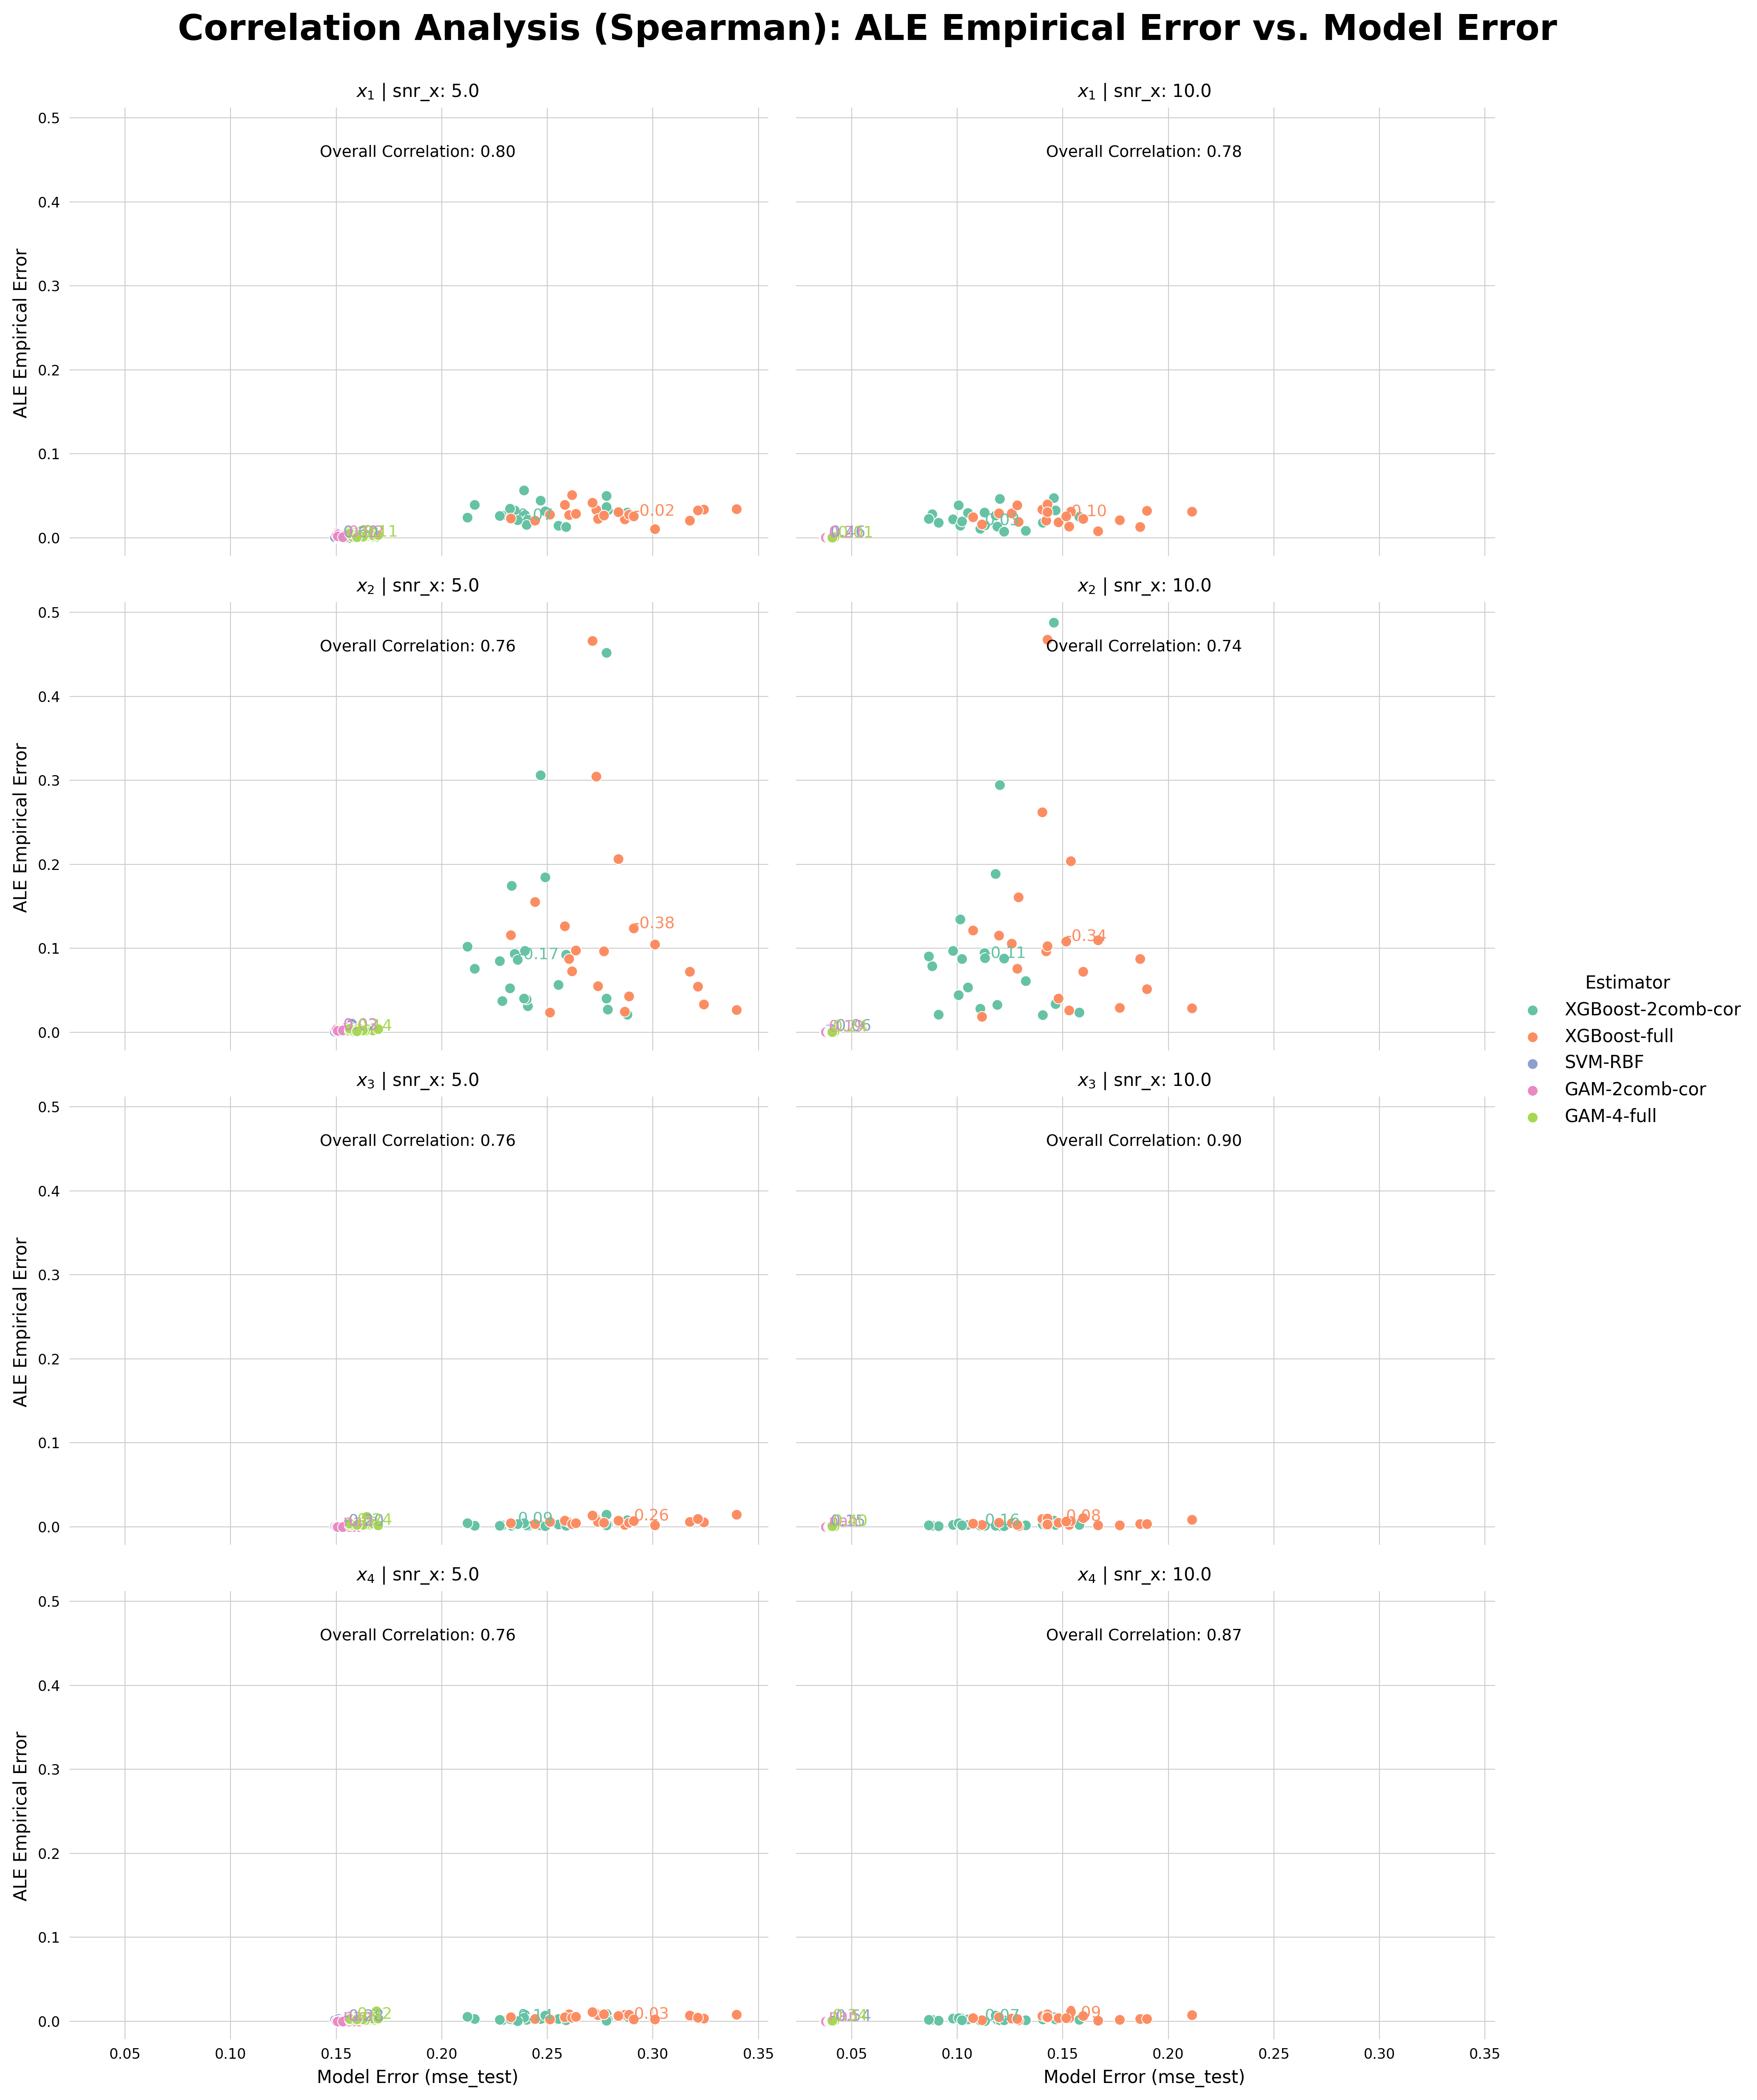

In [14]:
models = df_melted["model_x"].unique().tolist()

g, df_corr = plot_correlation_analysis(
    df_melted,
    models,
    model_error_metric="mse_test",
    feature_effect="ALE Empirical",
    correlation_metric="Spearman",
    overall_correlation=True,
    return_correlation_table=True,
)

In [15]:
g;

In [16]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_corr.set_index(["feature", "snr", "model"]))

correlation
feature snr  model                         
x_1     5.0  Overall               0.798980
             XGBoost-2comb-cor     0.067669
             XGBoost-full         -0.022556
             SVM-RBF               0.604511
             GAM-2comb-cor        -0.019549
             GAM-4-full           -0.114286
        10.0 Overall               0.777354
             XGBoost-2comb-cor     0.025564
             XGBoost-full         -0.096241
             SVM-RBF               0.458647
             GAM-2comb-cor         0.212030
             GAM-4-full           -0.009023
x_2     5.0  Overall               0.763480
             XGBoost-2comb-cor    -0.165414
             XGBoost-full         -0.383459
             SVM-RBF               0.018045
             GAM-2comb-cor         0.028571
             GAM-4-full            0.138346
        10.0 Overall               0.738278
             XGBoost-2comb-cor    -0.108271
             XGBoost-full         -0.341353
             SVM-RBF              -0.064662
             GAM-2comb-cor         0.193985
             GAM-4-full            0.237594
x_3     5.0  Overall               0.760063
             XGBoost-2comb-cor     0.091729
             XGBoost-full          0.258647
             SVM-RBF              -0.196992
             GAM-2comb-cor              NaN
             GAM-4-full            0.243609
        10.0 Overall               0.896329
             XGBoost-2comb-cor     0.157895
             XGBoost-full          0.082707
             SVM-RBF               0.147368
             GAM-2comb-cor              NaN
             GAM-4-full            0.395489
x_4     5.0  Overall               0.758870
             XGBoost-2comb-cor     0.138346
             XGBoost-full          0.030075
             SVM-RBF              -0.282707
             GAM-2comb-cor              NaN
             GAM-4-full            0.421053
        10.0 Overall               0.872459
             XGBoost-2comb-cor     0.069173
             XGBoost-full          0.091729
             SVM-RBF              -0.535338
             GAM-2comb-cor              NaN
             GAM-4-full            0.342857